In [5]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
# Add the function directory to the path
# sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
import matplotlib as mpl
mpl.style.use('pof')

In [27]:
"""Read 2D surface elevation data"""
def read_eta (time):
    # Read in data and some cleaning 
    path = '/home/jiarong/research/projects/turbulence/curved_fixREtau_boundary_REtau720_BO200_g4_ak0_MU8_LEVEL10_emax0.3/'
    filename = path + 'eta/eta_t%g' %time
    snapshot = pd.read_table(filename, delimiter = ',')
    snapshot = snapshot[snapshot.x != 'x']
    snapshot = snapshot.astype('float')
    snapshot = snapshot[snapshot.pos < 1+ 0.4/4]

    # Interpolate unstructured grid data onto uniform grid
    from scipy.interpolate import griddata
    L0 = np.pi*2.; N = 512
    xarray = np.linspace(-L0/2.,L0/2.,N,endpoint=False)+L0/2**N/2 #Centered grid
    zarray = np.linspace(-L0/2.,L0/2.,N,endpoint=False)+L0/2**N/2 #size of self.N*self.N
    x_tile, z_tile = np.meshgrid(xarray,zarray)
    xdata = np.array(snapshot.x); zdata = np.array(snapshot.z); etadata = np.array(snapshot.pos)
    eta_tile = griddata((xdata.ravel(), zdata.ravel()), etadata.ravel(), (x_tile, z_tile), method='nearest')
    return eta_tile

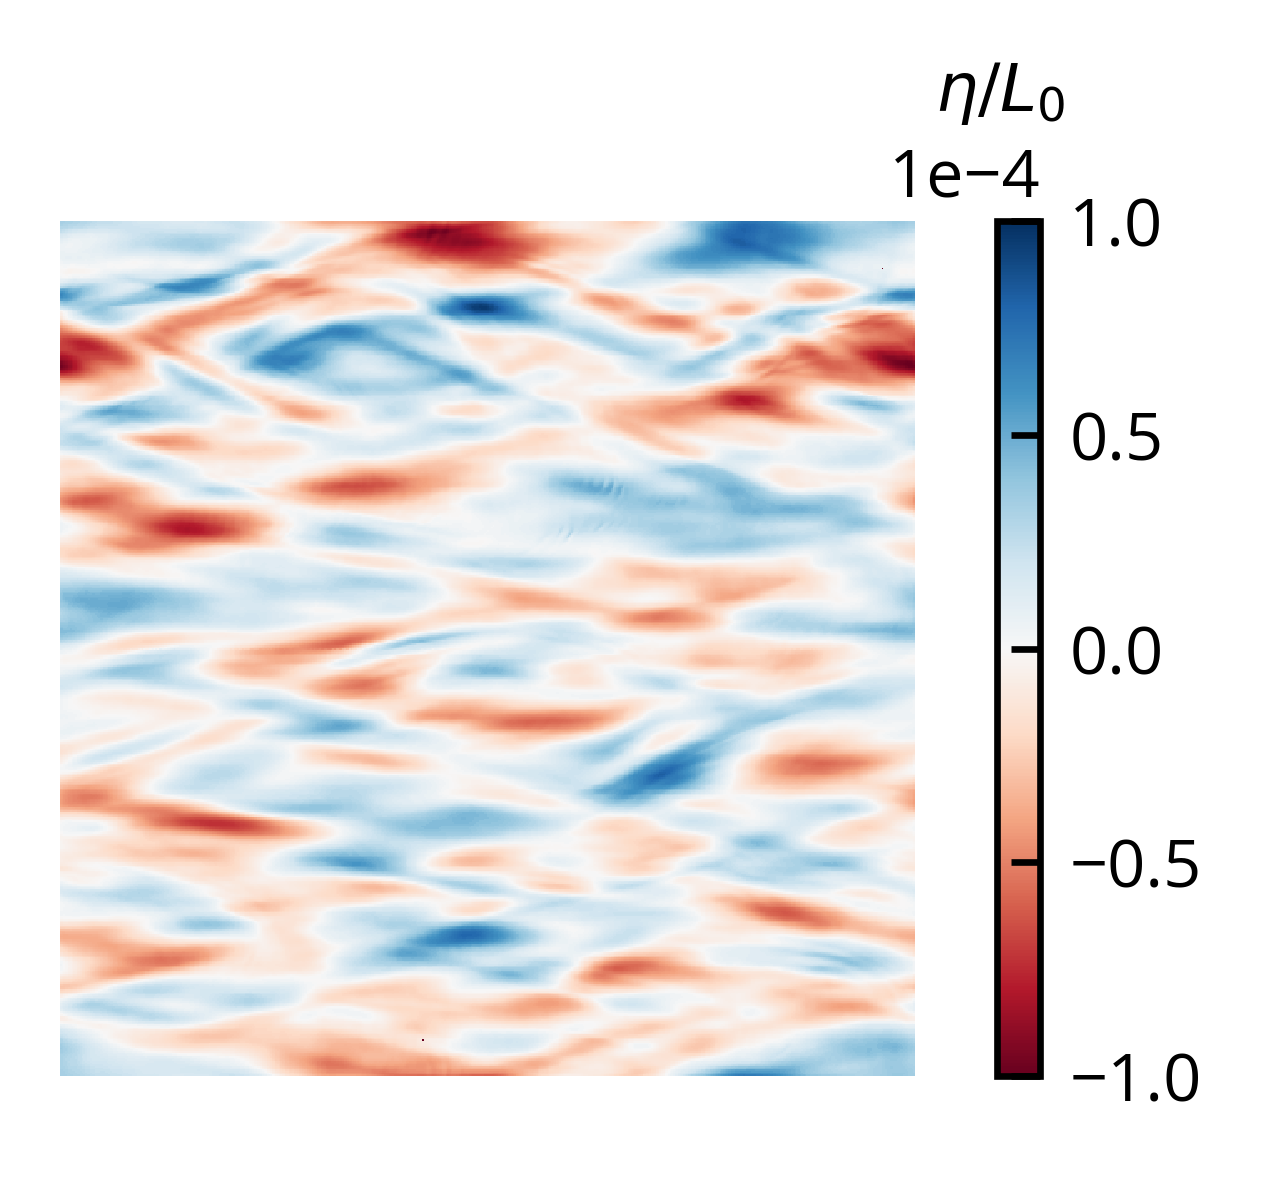

In [28]:
"""Plot at given time"""
plt.figure(figsize=[3,2])
eta_tile = read_eta (65)
plt.imshow((eta_tile-1)/2/np.pi, cmap='RdBu', vmax = 0.0001, vmin = -0.0001, extent=[-np.pi,np.pi,0,2*np.pi])
plt.axis('off')
ax = plt.gca()
ax.text(1.1,1.15, r'$\eta/L_0$', ha='center', va='center', transform=ax.transAxes)
plt.colorbar()

In [ ]:
""" See if there is turbulence in the water. x-y slice """
fig = plt.figure (figsize = [6,1.5])
case = case4
time = np.arange(124,125,1)
NGRID = 512; NSLICE = 256; L0 = 2*np.pi
nslice = 90 # number of chosen slice 
working_dir = case.path

for t in tqdm(time):
    filename = working_dir + 'field/' + 'f' + '_t%g_slice%g' % (t,nslice)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    f = np.array(snapshot[:,0:NGRID].astype(np.float))
    filename = working_dir + 'field/' + 'ux' + '_t%g_slice%g' % (t,nslice)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    ux = np.array(snapshot[:,0:NGRID].astype(np.float))
    u_water = f*ux
plt.imshow(np.rot90(u_water[:,0:128])/case.wave.c, cmap='RdBu', vmax = 0.4, vmin = -0.4, extent=[-np.pi,np.pi,0,0.5*np.pi])
ax = plt.gca(); ax.text(1.1,1.1, r'$u_w/c$', ha='center', va='center', transform=ax.transAxes)
plt.colorbar(); ax.axis('off')

In [ ]:
""" See if there is turbulence in the water. x-z slice """
fig = plt.figure (figsize = [6,1.5])
case = case4
time = np.arange(124,125,1)
NGRID = 512; NSLICE = 256; L0 = 2*np.pi
working_dir = case.path

ux3D = []
for t in tqdm(time):
    for nslice in range(0,256):
        filename = working_dir + 'field/' + 'f' + '_t%g_slice%g' % (t,nslice)
        snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
        snapshot.reshape([NGRID,NGRID+1])
        f = np.array(snapshot[:,0:NGRID].astype(np.float))
        filename = working_dir + 'field/' + 'ux' + '_t%g_slice%g' % (t,nslice)
        snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
        snapshot.reshape([NGRID,NGRID+1])
        ux = np.array(snapshot[:,0:NGRID].astype(np.float))
        u_water = f*ux
        # axis0-z; axis1-x; axis2-y
        ux3D.append(u_water)
ux3D = np.array(ux3D)

# Choose a slice 
plt.imshow(np.rot90(ux3D[:,256,0:128])/case.wave.c, cmap='RdBu', vmax = 0.4, vmin = -0.4, extent=[-np.pi,np.pi,0,0.5*np.pi])
ax = plt.gca(); ax.text(1.1,1.1, r'$u_w/c$', ha='center', va='center', transform=ax.transAxes)
plt.colorbar(); ax.axis('off')